<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/Flecha_Cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/MaricelaMH/Simulacion-1/blob/main/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

$$ x_1 : \text{ Diámetro del espacio en el cojinete, que sigue una distribución normal }$$ $$ N(1.5,0.04) $$

$$x_2: \text{ Diámetro de la flecha, que sigue una distribución normal }$$ $$ N(1.48,0.03)$$

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_2 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

* Si $x_2 - x_1 > 0 $ ,  hay interferencia (la flecha es más grande que el espacio en el cojinete).

* Si $x_2 - x_1 \leq 0 $ ,las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [72]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

* Llamaremos a la función interferencia, que ejecuta el código anterior y devuelve 1 o 0 según haya interferencia o no.

In [73]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [74]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

* Realizaremos 500 iteraciones al experimento, con ayuda de nuestra funcion definida anteriormente iremos acumulando la probabilidad de interferencia en cada iteración.

In [103]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

* Se graficara cómo esta probabilidad converge a medida que aumenta el número de iteraciones

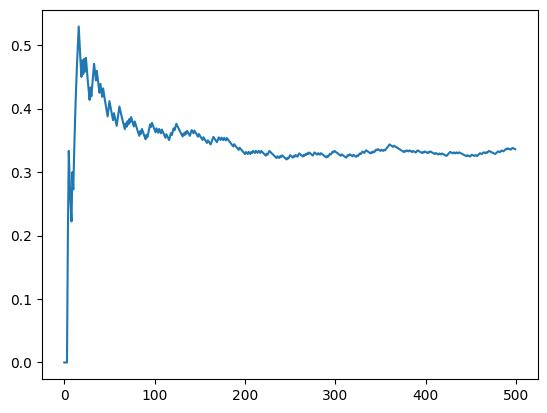

In [104]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

* Imprimimos la media y la desviación estándar de las probabilidades acumulativas.

In [105]:
print(np.mean(X), np.std(X))

0.3446589438682182 0.04665105138153458


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [106]:
def modelo(n):
    lista=[]                        # Inicializamos una lista vacía para almacenar las medias de las probabilidades
    for i in range(n):               # Repetimos el experimento 'n' veces
        s = prob_inter(500)          # Ejecutamos la función 'prob_inter' para realizar el experimento
        lista.append(np.mean(s))     # Calculamos la media de las probabilidades obtenidas y la agregamos a la lista 'lista'
    return lista

In [107]:
Y=modelo(120)         # Llamamos a la función 'modelo' para repetir el experimento 120 veces

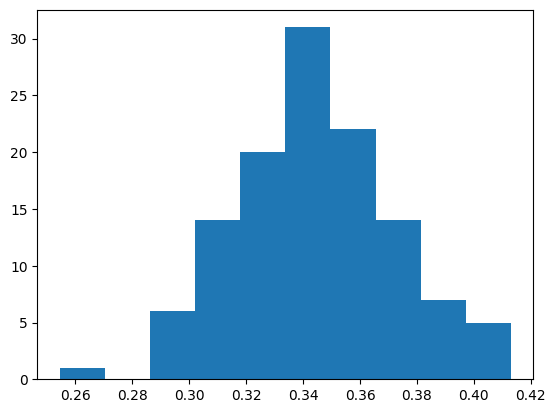

In [108]:
plt.hist(Y)          # Graficamos un histograma de las medias de las probabilidades
plt.show()

In [109]:
print(np.mean(Y), np.std(Y))     # Calculamos la media y la desviación estándar de las medias de las probabilidades

0.34439943070825013 0.027560894478777784


### Paso 7. Hallamos el intervalo de confianza.
* Sabemos que la media muestral $\bar{x}$ de una muestra de tamaño $n$ tomada de una población con media $\mu$ y desviación estándar $\sigma$ sigue una distribución normal:
$$ \bar{x} \sim N(\mu,\frac{\sigma}{\sqrt{n}} )$$
Para muestras grandes, la distribución normal estándar es una buena aproximación, si tuvieramos una muestra pequeña, tendriamos que usar la distribución $t-student$

* Para encontrar un intervalo de confianza, primero estandarizamos la media muestral $\bar{x}$ usando la formula:
$$Z=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
Donde $Z$ sigue una distribución normal estándar con $N(0,1)$

* Para un intervalo de confianza del $(1-\alpha) \cdot 100\%$, los valores críticos $z_\frac{\alpha}{2}$ son tales que:

$$P(-z_\frac{\alpha}{2} \leq \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} \leq z_\frac{\alpha}{2}) = 1-\alpha$$
multiplicando por $\frac{s}{\sqrt{n}}$:

$$ P(-z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} \leq \bar{x} - \mu \leq z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}})=1-\alpha$$

sumamos $\mu$ y restamos $\bar{x}$:

$$P(\bar{x}-z_\frac{\alpha}{2} \cdot \frac{s}{\sqrt{n}} \leq \mu \leq \bar{x}+z_\frac{\alpha}{2} \cdot \frac{s}{\sqrt{n}}) $$

Hemos demostrado que el intervalo de confianza del $(1-\alpha)\cdot 100\%$ para la media poblacional $\mu$ esta dado por:

$$\bar{x}-z_\frac{\alpha}{2} \cdot \frac{s}{\sqrt{n}} \leq \mu \leq \bar{x}+z_\frac{\alpha}{2} \cdot \frac{s}{\sqrt{n}}$$

Con la emostración anterior podemos calcular el intervalo de confianza para la media de una muestral por lo que, sabiendo que:

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

donde
* $\bar{x} \text{ : es la media muestral}$
* $z_{\frac{\alpha}{2}} \text{ : es el valor crítico de la distribución normal para el nivel de confianza deseado.}$
* $s \text{ : es la desviación estándar de la muestra}$
* $ n \text{ : es el tamaño de la muestra}$


1. Que queremos calcular un intervalo de confianza para la media de las diferencias $x_2 - x_1$ , utilizaremos los siguientes valores:

$$ \rightarrow \bar{x} = 1.48-1.5=-0.02$$$$ \text{ (media muestral, igual a la media teórica en este caso)}$$

$$\rightarrow s = \sqrt{0.0025} = 0.05 $$ $$\text{ (desviación estándar muestral, igual a la desviación estándar teórica en este caso)}$$

$$\rightarrow  n=50 $$
$$ \text{(Número de simulaciones que determinamos, en este caso 50) }$$

$$\rightarrow \text{ Un nivel de confianza del }95\% \text{ por lo que } z_{\frac{\alpha}{2}} \approx 1.96$$


2. El margen de error de $E$ se calcula como:
$$E = z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}}$$
sustituyendo valores
$$ E= 1.96 \cdot \frac{0.05}{\sqrt{50}} \approx{0.0138}$$
por lo que el intervalo de confianza es:
$$ \bar{x} - E < \mu < \bar{x} + E$$
sustituyendo valalores \\

$$ \Rightarrow -0.02-0.0138 < \mu < -0.02 + 0.0138  $$

$$ ⇒ -0.0338 < \mu < -0.0062$$

3. Con un nivel de confianza del 95\%, el intervalo de confianza para la media de las diferencias x_2 - x_1 es aproximadamente de $$[-0.0338,-0.0062]$$


In [110]:
np.mean(Y)              # Calculamos la media de los resultados de las 120 simulaciones

0.34439943070825013

In [111]:
np.std(Y)/np.sqrt(50)   # Calcular el margen de error

0.0038976990763021297

In [112]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) # Calculamos el intervalo de confianza

(0.33675994051869795, 0.3520389208978023)

Aqui nuestro resultado puede variar un poco, comparandolo con el resultado analítico esto por cuestión de decimales y por que la media muestral que tomamos es igual a la media teorica proporcionada.

### Para determinar el número de simulaciones

Vamos a usar la fórmula
$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

donde:

* $\sigma \text{ : es la desviación estándar de la diferencia } x_2-x_1$
* $z_\frac{\alpha}{2} \text{ : es el valor crítico de la distribución normal para un nivel de confianza al } 95\%$
* $\epsilon \text{ : es el error de estimación permitido } (0.01)$

en este caso:
$$⇒  \sigma= 0.05 $$
$$⇒  z_\frac{\sigma}{2} = 1.96 $$
$$ ⇒ \epsilon = 0.01 $$

sustituimos valores

$$N > \Bigg(\frac{2 \cdot 0.05 \cdot 1.96}{0.01} \Bigg)^2$$
por lo tanto
$$ N > (19.6)^2 = 384.16 $$

por lo que necesitaremos mas de $384$ simulaciones para que la probabilidad estimada de interferencia difiera de su valor verdadero en menos de $0.01$, con un nivel de confianza del $95\%$.

In [113]:
N = (2*np.std(X)*1.96/0.01)**2       # Calculamos el número de simulaciones necesarias

In [114]:
print(N)

334.4221279104763


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal, la cual nos dice que:

* Si $X$ y $Y$ son variables aleatorias independientes con distribuciones normales $$X \sim N(\mu_X,\sigma^2_X)$$ y $$Y \sim N(\mu_Y,\sigma^2_Y)$$
entonces $X-Y$ sigue una distribución normal con media igual a la diferencia de las medias y varianza igual a la suma de las varianzas de las dos variables originales.
En este caso $x_1$ y $x_2$ son independientes y tienen distribuciones normales, por lo que podemos aplicar este teorema para encontrar la distribución de $x_2-x_1$

De lo anterior tenemos que

$$ x_2 - x_1 \sim N( \mu_{x_2} - \mu_{x_1} , \sigma_{x_2}^2 + \sigma_{x_1}^2)$$

$$⇒ x_2 - x_1 \sim N( 1.48-1.5 , \sqrt{0.0009 + 0.0016}) $$

$$⇒ x_2 - x_1 \sim N( -0.02, 0.05) $$

* Calcularemos la probabilidad de la interferencia, la cual esta dada por

$$ P(x_2 - x_1 > 0)$$

Dado que $x_2 - x_1 $ sigue una distribución normal $N(-0.02,0.05)$, esto implica que

$$ P \Bigg(Z > \frac{0-(-0.02)}{0.05} \Bigg) = P \Bigg (Z > \frac{0.02}{0.05} \Bigg) = P ( Z > 0.4 )$$

Usamos la tabla de la distribución normal estándar $(Z)$ para encontrar esta probabilidad:

$$ P ( Z > 0.4 ) = 1- P ( Z \leq 0.04 ) \approx 1 - 0.6554 = 0.3446$$

Por lo tanto, la probabilidad de interferencia es aproximadamente
$0.34460$ o $34.46\%$

In [ ]:
norm.cdf(-0.04, -0.02, 0.05)    # Calculamos la probabilidad acumulada

0.3445782583896758

In [ ]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)   # Diferencia entre la CDF calculada y la media de Y

0.0023943319277625608

Finalmente:

a) La probabilidad de que haya interferencia es aproximadamente
$34.46\%$

b) Se necesitarían más de $384$ simulaciones para que la probabilidad estimada de interferencia difiera de su valor verdadero en menos de %0.01%, con un nivel de confianza del $95\%$.